In [1]:
import torch
torch.set_grad_enabled(False) # REQUIRED

## 1. Generating the data

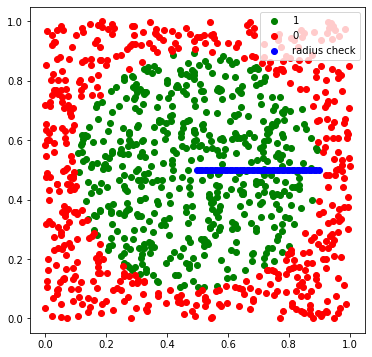

In [2]:
from utils import generate_dataset, show_dataset

X, y = generate_dataset()
show_dataset(X, y)

## using ReLU

In [3]:
from module import ReLU

r = ReLU()

r.forward(torch.tensor([-2, 0, 1, -0.4, 5]))

tensor([0., 0., 1., 0., 5.])

### Testing linear regression

Text(0.5, 1.0, 'Error on b')

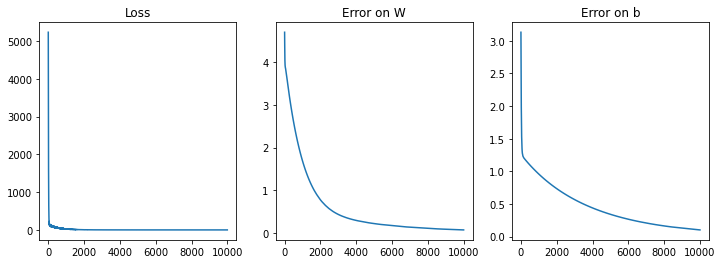

In [21]:
from module import Linear 
import matplotlib.pyplot as plt



n_samples = 1000
input_dim = 10
output_dim = 2

x0 = torch.rand((n_samples, input_dim))


y = torch.rand((n_samples, output_dim))


W = torch.empty((output_dim, input_dim)).normal_(0, 1)
b = torch.empty(output_dim).normal_(0, 1)
y = torch.zeros((n_samples, output_dim))


for i in range(n_samples):
    x = x0[i]
    y[i] = torch.mv(W, x) + b
    
y += 0.05*torch.empty(y.shape).normal_(0, 1)
    
ll = Linear(input_dim, output_dim)

losses, d_w, d_b = [], [], []


nb_epochs = 1000
mini_batch_size = 100
lr = 1e-4/n_samples*mini_batch_size



for epoch in range(nb_epochs):
    ll.zero_grad()
    for i in range(0, x0.size(0), mini_batch_size):
        input_ = x0.narrow(0, i, mini_batch_size)
        target = y.narrow(0, i, mini_batch_size)
        x2 = ll.forward(input_)
        error = target - x2
        loss = torch.pow(error, 2).sum()

        grad_output = -2*error
        grad_input = ll.backward(grad_output)
        

        ll.W -= lr*ll.grad_W
        ll.b -= lr*ll.grad_b
        losses.append(loss.item())
        d_w.append(torch.norm(W-ll.W))
        d_b.append(torch.norm(b-ll.b.squeeze()))
    
f, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].plot(losses)
ax[0].set_title('Loss')
ax[1].plot(d_w)
ax[1].set_title('Error on W')
ax[2].plot(d_b)
ax[2].set_title('Error on b')

In [22]:
W, ll.W

(tensor([[ 0.7443,  0.9762,  0.5199, -1.9128,  0.1425, -1.4176,  1.1733,  0.0072,
           0.2218, -0.6010],
         [ 1.3657,  1.1351,  0.6095, -1.0219,  0.8063, -0.9936, -0.7700, -0.6813,
           0.3845, -0.0966]]),
 tensor([[ 0.7467,  0.9812,  0.5324, -1.9095,  0.1454, -1.4128,  1.1837,  0.0177,
           0.2309, -0.5876],
         [ 1.3498,  1.1160,  0.5911, -1.0216,  0.7947, -1.0058, -0.7926, -0.7089,
           0.3576, -0.1245]]))

In [23]:
b, ll.b.squeeze()

(tensor([ 1.6934, -2.0223]), tensor([ 1.6579, -1.9262]))

In [24]:
d_w[-1], d_b[-1]

(tensor(0.0687), tensor(0.1025))

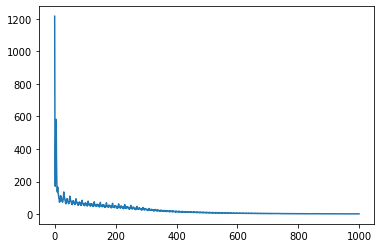

In [17]:
from module import ReLU 


hidden_dim = 5
L1 = Linear(input_dim, hidden_dim)
R = ReLU()
L2 = Linear(hidden_dim, output_dim)

losses, d_w, d_b = [], [], []


nb_epochs = 100
mini_batch_size = 100
lr = 1e-3/n_samples*mini_batch_size



for epoch in range(nb_epochs):
    L1.zero_grad()
    L2.zero_grad()
    for i in range(0, x0.size(0), mini_batch_size):
        input_ = x0.narrow(0, i, mini_batch_size)
        target = y.narrow(0, i, mini_batch_size)
        
        x1 = L1.forward(input_)
        s1 = R.forward(x1)
        x2 = L2.forward(s1)
        
        error = target - x2
        
        loss = torch.pow(error, 2).sum()

        grad_x2 = -2*error
        grad_s1 = L2.backward(grad_x2)
        grad_x1 = R.backward(grad_s1)
        grad_input = L1.backward(grad_x1)
        

        L1.W -= lr*L1.grad_W
        L1.b -= lr*L1.grad_b
        
        L2.W -= lr*L2.grad_W
        L2.b -= lr*L2.grad_b
        
        losses.append(loss.item())
    

plt.plot(losses)
